***installing Dependences***

In [2]:
! pip install lightgbm xgboost

  Using cached lightgbm-3.3.3-py3-none-manylinux1_x86_64.whl (2.0 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 668.3 kB/s eta 0:00:0000:0100:08
  Using cached scikit_learn-1.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.5 MB)
  Using cached scipy-1.9.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (33.7 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)


### Importing Libraries

In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### Importing Dataset

In [4]:
train = pd.read_csv("/home/yash/project/Feynn_Labs/Project2 /Online-Vehicle-Booking-Market/Dataset/sigma_cabs.csv")
train.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [5]:
train.describe()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
count,131662.000000,125742.000000,111469.000000,131662.000000,131662.000000,60632.000000,131662.000000,131662.000000,131662.000000
mean,44.200909,6.016661,2.802064,2.849458,0.782838,64.202698,51.202800,75.099019,2.155747
std,25.522882,3.626887,0.225796,0.980675,1.037559,21.820447,4.986142,11.578278,0.738164
min,0.310000,0.000000,1.596380,0.001250,0.000000,30.000000,40.000000,52.000000,1.000000
25%,24.580000,3.000000,2.654730,2.152500,0.000000,46.000000,48.000000,67.000000,2.000000
50%,38.200000,6.000000,2.798050,2.895000,0.000000,61.000000,50.000000,74.000000,2.000000
75%,60.730000,10.000000,2.946780,3.582500,1.000000,80.000000,54.000000,82.000000,3.000000
max,109.230000,10.000000,4.875110,5.000000,8.000000,210.000000,124.000000,206.000000,3.000000


In [7]:
train.shape

(131662, 14)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  111452 non-null  object 
 3   Customer_Since_Months        125742 non-null  float64
 4   Life_Style_Index             111469 non-null  float64
 5   Confidence_Life_Style_Index  111469 non-null  object 
 6   Destination_Type             131662 non-null  object 
 7   Customer_Rating              131662 non-null  float64
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         60632 non-null   float64
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  object 
 13 

In [9]:
train.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

### Data Preprocessing

In [10]:
train.replace(r'^\s*$',np.nan,regex=True)

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131657,T0005908509,11.72,D,1.0,2.74229,A,A,3.28500,0,61.0,47,76,Male,3
131658,T0005908510,74.81,C,7.0,2.81059,C,A,0.44500,0,NaN,63,88,Male,2
131659,T0005908512,40.17,C,10.0,2.99565,B,A,3.33625,0,NaN,48,75,Female,2
131660,T0005908513,46.88,B,4.0,3.04744,A,B,4.15750,1,47.0,54,79,Male,2


### Null Values

Since the Type_of_cab have empty columns we replace them by mode of Type_of_column.

Since the Customer_Since_Month have empty column we will replace them by mean of the Customer_Since_Months Column.

Since the Life_Style_index have emplty column we will replace them by them mean of the Life_Style_Index column.

Since the Confidence_Life_Style_Index have empty columns we will replace by the mean of the Confidence_Life_Style_Index column

Since the Var1 have empty columns we will replace them by the mean of the Var1 column.

In [11]:
train['Type_of_Cab'] = train['Type_of_Cab'].fillna(train['Type_of_Cab'].mode()[0])

train['Customer_Since_Months'] = train['Customer_Since_Months'].fillna(train['Customer_Since_Months'].mean())

train['Life_Style_Index'] = train['Life_Style_Index'].fillna(train['Life_Style_Index'].mean())

train['Confidence_Life_Style_Index'] = train['Confidence_Life_Style_Index'].fillna(train['Confidence_Life_Style_Index'].mode()[0])

train['Var1'] = train['Var1'].fillna(train['Var1'].mean())


In [12]:
train.isnull().sum()

Trip_ID                        0
Trip_Distance                  0
Type_of_Cab                    0
Customer_Since_Months          0
Life_Style_Index               0
Confidence_Life_Style_Index    0
Destination_Type               0
Customer_Rating                0
Cancellation_Last_1Month       0
Var1                           0
Var2                           0
Var3                           0
Gender                         0
Surge_Pricing_Type             0
dtype: int64

In [13]:
train = train.drop(['Trip_ID'], axis=1)

In [14]:
train.Destination_Type.unique()

array(['A', 'E', 'B', 'C', 'G', 'D', 'F', 'K', 'L', 'H', 'I', 'J', 'M',
       'N'], dtype=object)

### Converting Categorical Values into numerical values

In [20]:
cleanup_nums={"Type_of_Cab": {"A":1, "B":2, "C":3, "D":4, "E":5},
              "Confidence_Life_Style_Index": {"A":1, "B":2, "C":3},
              "Destination_Type":{'A':1, 'E':5, 'B':2, "C":3, "G":7, "D":4, "F":6, "K":11, "L":12, "H":8, "I":9, "J":10, "M":13, "N":14},
              "Gender":{"Male":1, "Female":2}}



In [21]:
train = train.replace(cleanup_nums)

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_Distance                131662 non-null  float64
 1   Type_of_Cab                  131662 non-null  int64  
 2   Customer_Since_Months        131662 non-null  float64
 3   Life_Style_Index             131662 non-null  float64
 4   Confidence_Life_Style_Index  131662 non-null  int64  
 5   Destination_Type             131662 non-null  int64  
 6   Customer_Rating              131662 non-null  float64
 7   Cancellation_Last_1Month     131662 non-null  int64  
 8   Var1                         131662 non-null  float64
 9   Var2                         131662 non-null  int64  
 10  Var3                         131662 non-null  int64  
 11  Gender                       131662 non-null  int64  
 12  Surge_Pricing_Type           131662 non-null  int64  
dtyp

In [23]:
train.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,6.77,2,1.0,2.427690,1,1,3.90500,0,40.000000,46,60,2,2
1,29.47,2,10.0,2.782450,2,1,3.45000,0,38.000000,56,78,1,2
2,41.58,2,10.0,2.802064,2,5,3.50125,2,64.202698,56,77,1,2
3,61.56,3,10.0,2.802064,2,1,3.45375,0,64.202698,52,74,1,3
4,54.95,3,10.0,3.034530,2,1,3.40250,4,51.000000,49,102,1,2


### Visualizing Data

<AxesSubplot: >

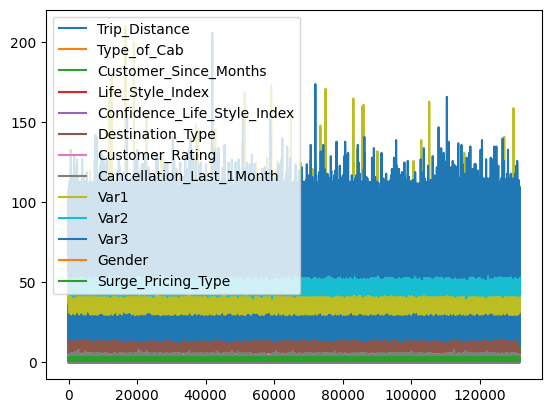

In [25]:
train.plot()

<AxesSubplot: xlabel='Surge_Pricing_Type'>

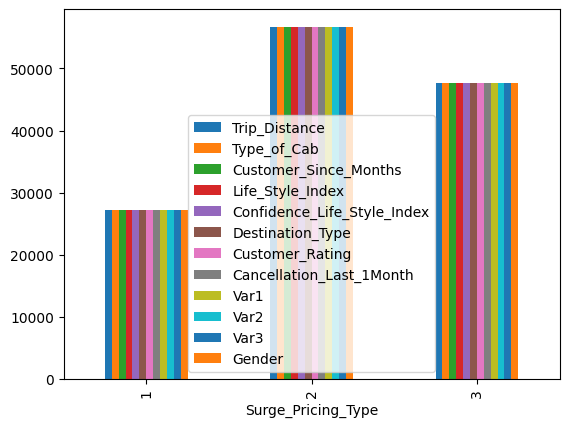

In [27]:
train.groupby('Surge_Pricing_Type').count().plot(kind='bar')

### Histogram

array([[<AxesSubplot: title={'center': 'Trip_Distance'}>,
        <AxesSubplot: title={'center': 'Type_of_Cab'}>,
        <AxesSubplot: title={'center': 'Customer_Since_Months'}>,
        <AxesSubplot: title={'center': 'Life_Style_Index'}>],
       [<AxesSubplot: title={'center': 'Confidence_Life_Style_Index'}>,
        <AxesSubplot: title={'center': 'Destination_Type'}>,
        <AxesSubplot: title={'center': 'Customer_Rating'}>,
        <AxesSubplot: title={'center': 'Cancellation_Last_1Month'}>],
       [<AxesSubplot: title={'center': 'Var1'}>,
        <AxesSubplot: title={'center': 'Var2'}>,
        <AxesSubplot: title={'center': 'Var3'}>,
        <AxesSubplot: title={'center': 'Gender'}>],
       [<AxesSubplot: title={'center': 'Surge_Pricing_Type'}>,
        <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

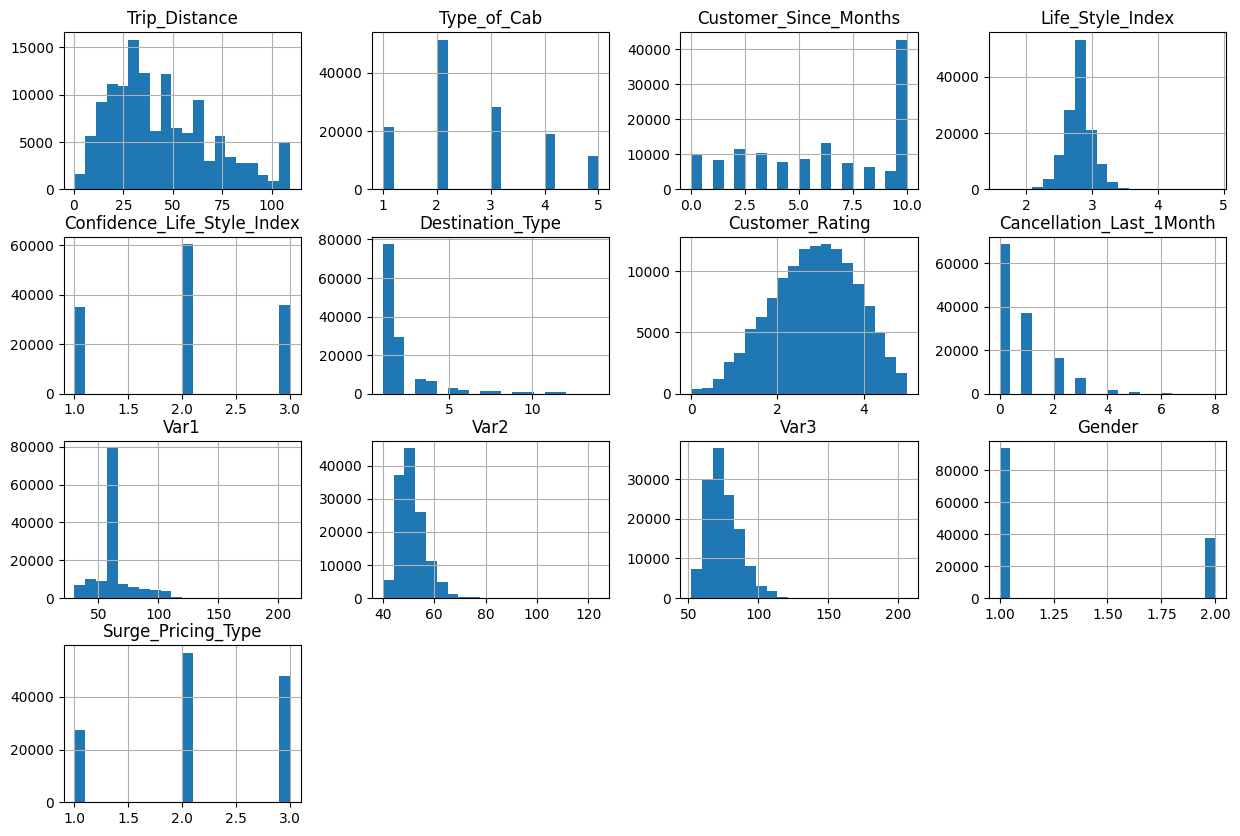

In [28]:
train.hist(bins = 20, figsize = (15, 10))

### Heatmap

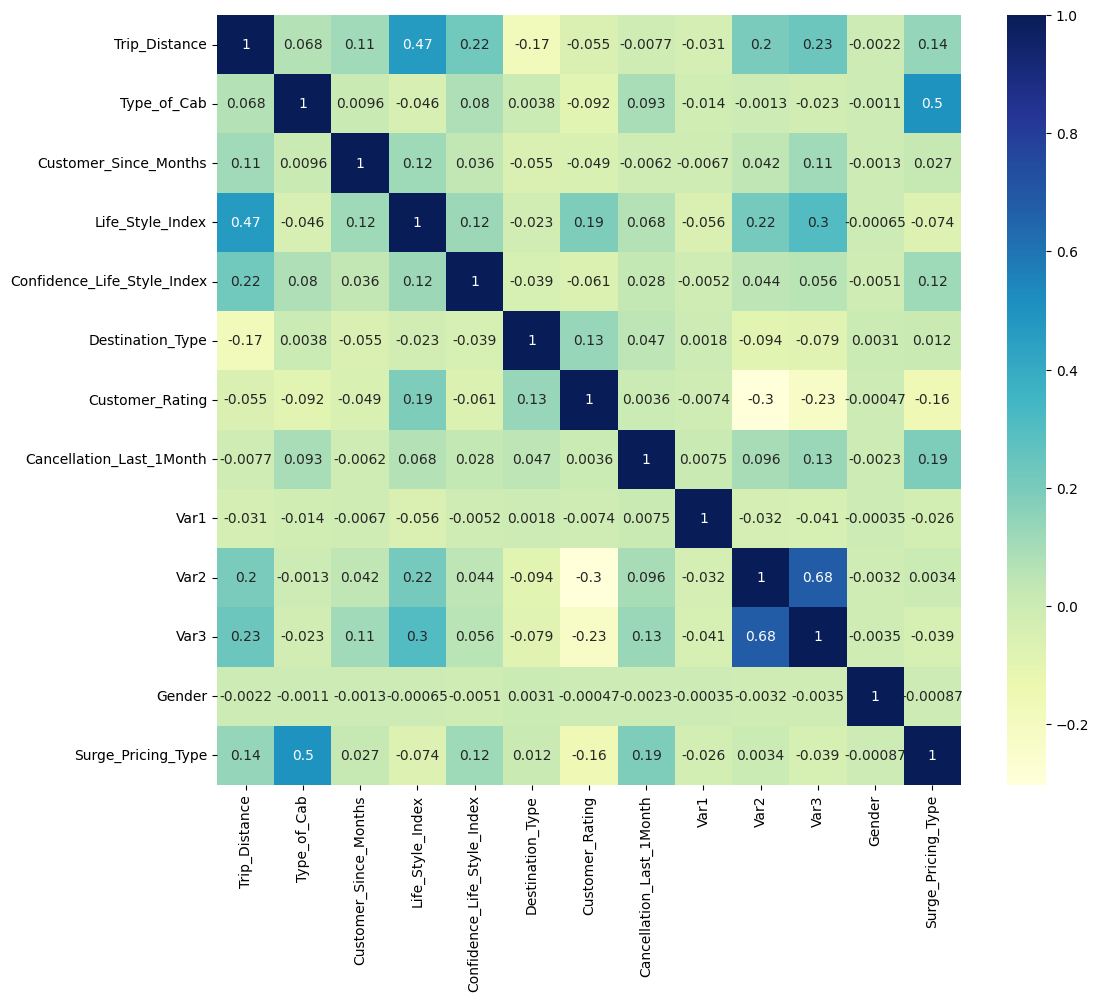

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(train.corr(), annot = True, cmap='YlGnBu')
plt.show()

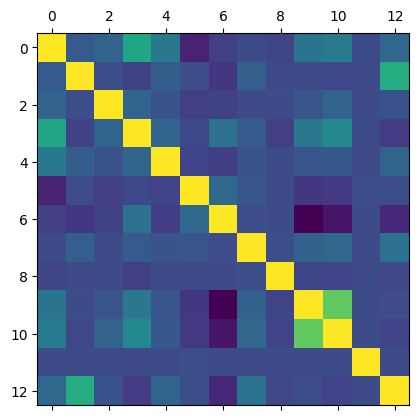

In [33]:
import matplotlib.pyplot as plt

plt.matshow(train.corr())
plt.show()

### Model Building

In [34]:
X = train.iloc[:, 0:12].values
y = train.iloc[:, 12].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(105329, 12) (26333, 12) (105329,) (26333,)


In [35]:
from sklearn.preprocessing import StandardScaler
sc_X  = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

Model Building

    --> Decision Tree
    --> Logistic Regression
    --> Random Forest
    --> KNN
    --> Naive Bayes
    --> XGB
    --> LGBM

### Decision Tree

In [36]:
# Decision Tree

model_tree   = DecisionTreeClassifier(random_state=0)
model_tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=0)

In [37]:
Y_pred1 = model_tree.predict(X_test)

print(confusion_matrix(y_test, Y_pred1))

[[2842 1714  924]
 [1769 6572 3013]
 [1033 2956 5510]]


In [38]:
print(accuracy_score(y_test, Y_pred1))

0.5667413511563437


In [39]:
print(classification_report(y_test, Y_pred1))

              precision    recall  f1-score   support

           1       0.50      0.52      0.51      5480
           2       0.58      0.58      0.58     11354
           3       0.58      0.58      0.58      9499

    accuracy                           0.57     26333
   macro avg       0.56      0.56      0.56     26333
weighted avg       0.57      0.57      0.57     26333



### Logistic Regression

In [40]:
model_linear = LogisticRegression()
model_linear.fit(X_train, y_train)

LogisticRegression()

In [41]:
Y_pred2 = model_linear.predict(X_test)

print(confusion_matrix(y_test, Y_pred2))

[[2801 2238  441]
 [ 611 8332 2411]
 [ 459 3372 5668]]


In [42]:
print(accuracy_score(y_test, Y_pred2))

0.6380207344396764


In [44]:
print(classification_report(y_test, Y_pred2))

              precision    recall  f1-score   support

           1       0.72      0.51      0.60      5480
           2       0.60      0.73      0.66     11354
           3       0.67      0.60      0.63      9499

    accuracy                           0.64     26333
   macro avg       0.66      0.61      0.63     26333
weighted avg       0.65      0.64      0.64     26333



### Random Forest Classifier

In [45]:
model_random = RandomForestClassifier(random_state=0)
model_random.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [46]:
Y_pred3 = model_random.predict(X_test)

print(confusion_matrix(y_test, Y_pred3))

[[2970 1997  513]
 [ 478 9302 1574]
 [ 468 3247 5784]]


In [47]:
print(accuracy_score(y_test, Y_pred3))

0.685679565564121


In [48]:
print(classification_report(y_test, Y_pred3))

              precision    recall  f1-score   support

           1       0.76      0.54      0.63      5480
           2       0.64      0.82      0.72     11354
           3       0.73      0.61      0.67      9499

    accuracy                           0.69     26333
   macro avg       0.71      0.66      0.67     26333
weighted avg       0.70      0.69      0.68     26333



### KNN

In [49]:
model_knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski',p=2)
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [50]:
Y_pred4 = model_knn.predict(X_test)

In [51]:
print(confusion_matrix(y_test, Y_pred4))

[[3066 1794  620]
 [2095 6927 2332]
 [1280 2970 5249]]


In [52]:
print(accuracy_score(y_test,  Y_pred4))

0.5788174533854858


In [53]:
print(classification_report(y_test, Y_pred4))

              precision    recall  f1-score   support

           1       0.48      0.56      0.51      5480
           2       0.59      0.61      0.60     11354
           3       0.64      0.55      0.59      9499

    accuracy                           0.58     26333
   macro avg       0.57      0.57      0.57     26333
weighted avg       0.59      0.58      0.58     26333



### Navie Bayes

In [54]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

GaussianNB()

In [56]:
Y_pred5 = model_nb.predict(X_test)

print(confusion_matrix(y_test, Y_pred5))

[[2775 2079  626]
 [ 641 8522 2191]
 [ 451 3310 5738]]


In [57]:
print(accuracy_score(y_test, Y_pred5))

0.6469069228724414


In [58]:
print(classification_report(y_test, Y_pred5))

              precision    recall  f1-score   support

           1       0.72      0.51      0.59      5480
           2       0.61      0.75      0.67     11354
           3       0.67      0.60      0.64      9499

    accuracy                           0.65     26333
   macro avg       0.67      0.62      0.63     26333
weighted avg       0.66      0.65      0.64     26333



### XGBoost

In [59]:
xg_reg = GradientBoostingClassifier()

xg_reg.fit(X_train, y_train)

Y_pred6 = xg_reg.predict(X_test)

print(confusion_matrix(y_test, Y_pred6))

[[2942 2036  502]
 [ 405 9634 1315]
 [ 496 3436 5567]]


In [60]:
print(accuracy_score(y_test, Y_pred6))

0.688983404853226


In [61]:
print(classification_report(y_test, Y_pred6))

              precision    recall  f1-score   support

           1       0.77      0.54      0.63      5480
           2       0.64      0.85      0.73     11354
           3       0.75      0.59      0.66      9499

    accuracy                           0.69     26333
   macro avg       0.72      0.66      0.67     26333
weighted avg       0.71      0.69      0.68     26333



### LGBM Classifier

In [62]:
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier()

In [63]:
Y_pred7 = clf.predict(X_test)

print(confusion_matrix(y_test, Y_pred7))

[[2972 2006  502]
 [ 427 9488 1439]
 [ 417 3277 5805]]


In [64]:
print(accuracy_score(y_test, Y_pred7))

0.6936163748908214


In [65]:
print(classification_report(y_test, Y_pred7))

              precision    recall  f1-score   support

           1       0.78      0.54      0.64      5480
           2       0.64      0.84      0.73     11354
           3       0.75      0.61      0.67      9499

    accuracy                           0.69     26333
   macro avg       0.72      0.66      0.68     26333
weighted avg       0.71      0.69      0.69     26333



In [66]:
result = {'Model Name':['Decision Tree', 'Logistic Regression','Random Forest','KNN','Naive Bayes', 'XGB', 'LGBM'],
            'Accuracy Score': [0.5667413511563437*100, 0.6380207344396764*100, 0.685679565564121*100, 0.5788174533854858*100, 0.6469069228724414*100, 0.688983404853226*100, 0.6936163748908214*100]}

In [67]:
res = pd.DataFrame.from_dict(result)
res

,Model Name,Accuracy Score
0,Decision Tree,56.674135
1,Logistic Regression,63.802073
2,Random Forest,68.567957
3,KNN,57.881745
4,Naive Bayes,64.690692
5,XGB,68.898340
6,LGBM,69.361637
